In [2]:
import tensorflow as tf

print("TensorFlow 버전:", tf.__version__)
print("GPU 사용 가능:", tf.config.list_physical_devices('GPU'))
print("CUDA 빌드:", tf.test.is_built_with_cuda())

TensorFlow 버전: 2.17.0
GPU 사용 가능: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CUDA 빌드: True


In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

2025-09-25 11:18:17.481643: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-25 11:18:17.504407: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-25 11:18:17.511644: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-25 11:18:17.529081: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-25 11:18:24.595885: W tensorflow/compiler/tf2

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 63s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

In [4]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

# Model

In [2]:
cnn = Sequential()
cnn.add(Conv2D(32,(3,3), activation='relu', input_shape = (32,32,3)))
cnn.add(Conv2D(32,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(units=512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10, activation='softmax'))

/home/devna0111/miniconda3/envs/tf-gpu/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758766827.148675    5094 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758766827.517601    5094 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758766827.517657    5094 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758766827.518825    

# 학습과정 compile

In [5]:
cnn.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 890,410 (3.40 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

# 모델 학습

In [6]:
hist = cnn.fit(x_train, y_train,
        batch_size=128, epochs=100,
        validation_data=(x_test,y_test))

2025-09-25 11:20:52.029282: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2025-09-25 11:20:53.156012: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100


I0000 00:00:1758766855.518714    5235 service.cc:146] XLA service 0x7a642c001e10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758766855.518745    5235 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 3GB, Compute Capability 6.1
2025-09-25 11:20:55.584166: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-25 11:20:55.902735: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  5/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.1087 - loss: 2.3082

2025-09-25 11:21:03.881531: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_2', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1758766863.896560    5235 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3184 - loss: 1.8303

2025-09-25 11:21:22.897844: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_2', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads



391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 76ms/step - accuracy: 0.4101 - loss: 1.6077 - val_accuracy: 0.5420 - val_loss: 1.2706
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.5724 - loss: 1.1985 - val_accuracy: 0.6262 - val_loss: 1.0644
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.6423 - loss: 1.0115 - val_accuracy: 0.6672 - val_loss: 0.9539
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.6866 - loss: 0.8890 - val_accuracy: 0.6955 - val_loss: 0.8622
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.7194 - loss: 0.8037 - val_accuracy: 0.7167 - val_loss: 0.8039
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.7432 - loss: 0.7296 - val_accuracy: 0.7313 - val_loss: 0.7605
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.7622 - loss: 0.6756 - val_accuracy: 0.7417 - val_loss: 0.7427
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.7811 - loss: 0.6207 - val_

In [25]:
hist.history

{'accuracy': [0.9060500264167786,
  0.9739999771118164,
  0.9816166758537292,
  0.9850666522979736,
  0.9873166680335999,
  0.9888333082199097,
  0.9908666610717773,
  0.9921666383743286,
  0.992900013923645,
  0.9936833381652832,
  0.9944666624069214,
  0.9953166842460632,
  0.9957000017166138,
  0.9959166646003723,
  0.9962000250816345,
  0.9961666464805603,
  0.9970666766166687,
  0.9970999956130981,
  0.9968166947364807,
  0.9969333410263062,
  0.9975166916847229,
  0.9973999857902527,
  0.9981333613395691,
  0.9972166419029236,
  0.9976500272750854,
  0.9987666606903076,
  0.997083306312561,
  0.998449981212616,
  0.9991666674613953,
  0.9982666373252869],
 'loss': [0.31790170073509216,
  0.08670935779809952,
  0.058798886835575104,
  0.04761239513754845,
  0.0388130247592926,
  0.03473762050271034,
  0.027776196599006653,
  0.025002647191286087,
  0.021095329895615578,
  0.019737636670470238,
  0.016392825171351433,
  0.013851159252226353,
  0.01254105195403099,
  0.0121518075466

# 모델 평가

In [7]:
res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확율 :", res[1]*100)

정확율 : 76.20999813079834


# 학습과정 체크

In [9]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 4.5 MB/s  0:00:01 eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 11.4 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 10.8 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


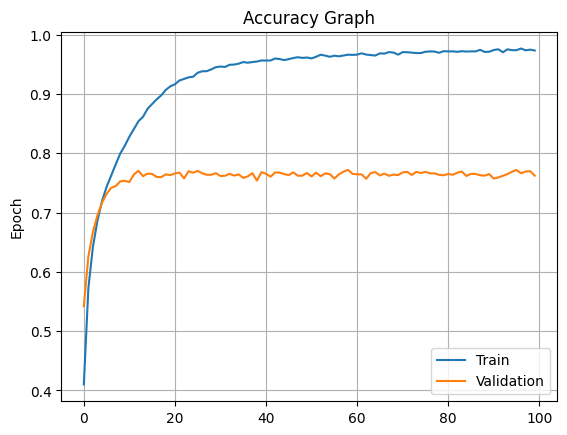

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.ylabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

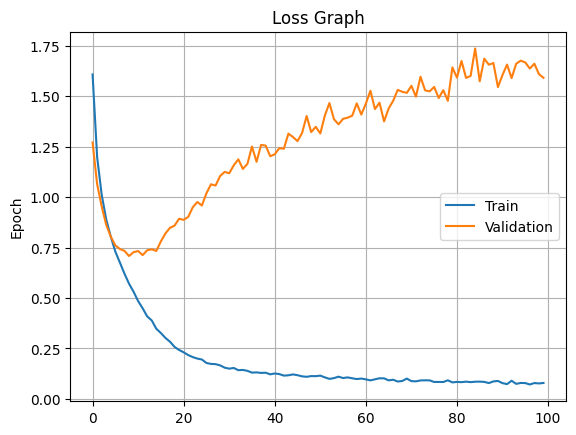

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Graph')
plt.ylabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()